In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [65]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [66]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [68]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

        GRE Scores ( out of 340 )
        TOEFL Scores ( out of 120 )
        University Rating ( out of 5 )
        Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
        Undergraduate GPA ( out of 10 )
        Research Experience ( either 0 or 1 )
        Chance of Admit ( ranging from 0 to 1 )

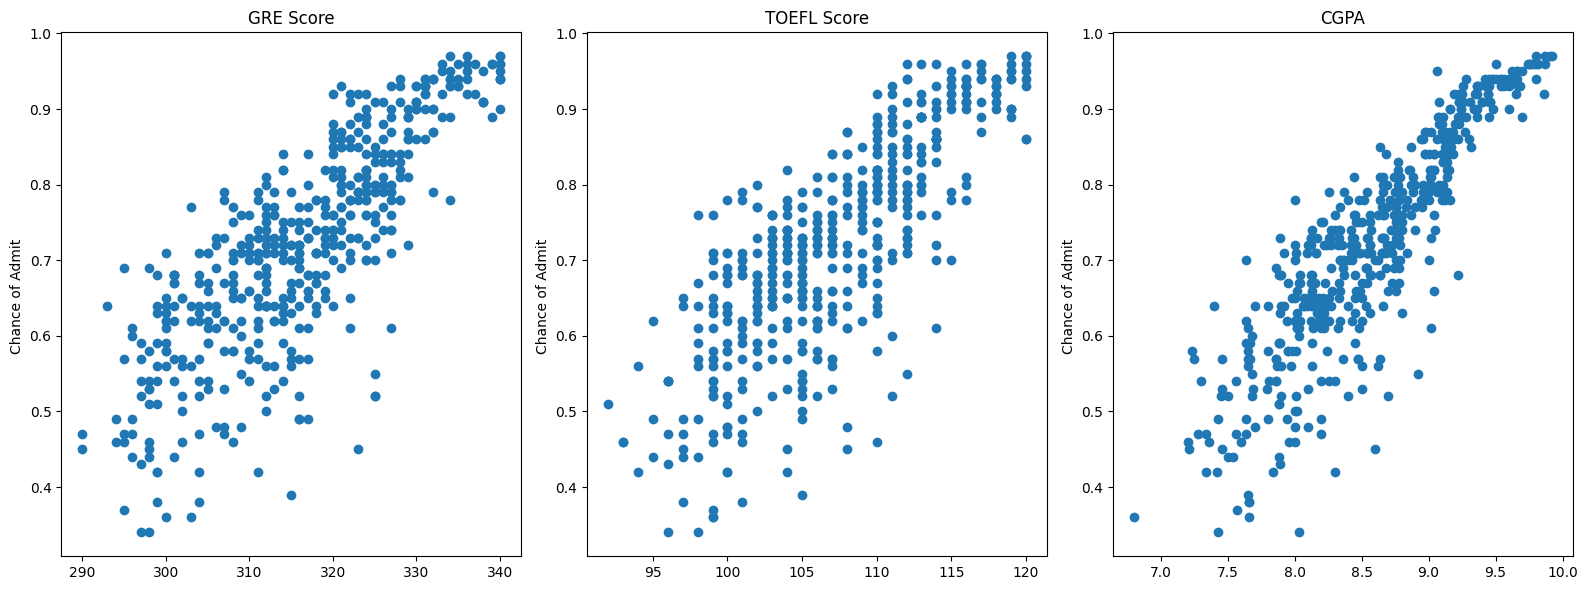

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))


axes[0].plot(df['GRE Score'], df['Chance of Admit '], 'o')
axes[0].set_ylabel("Chance of Admit ")
axes[0].set_title("GRE Score")

axes[1].plot(df['TOEFL Score'], df['Chance of Admit '], 'o')
axes[1].set_title("TOEFL Score")
axes[1].set_ylabel("Chance of Admit ")

axes[2].plot(df['CGPA'], df['Chance of Admit '], 'o')
axes[2].set_title("CGPA")
axes[2].set_ylabel("Chance of Admit ")


plt.tight_layout()


<Axes: >

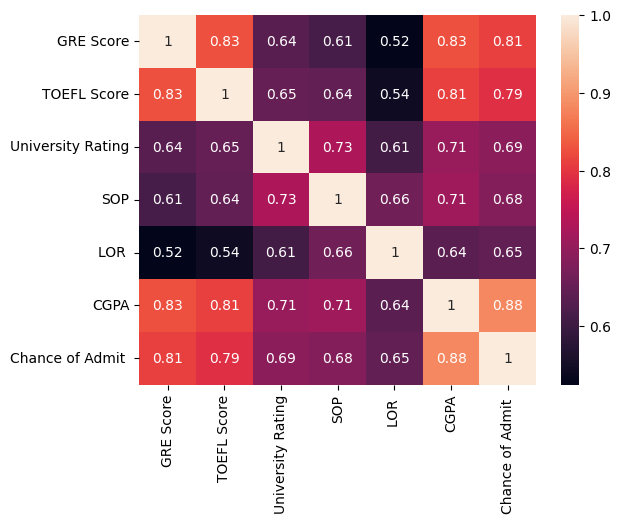

In [88]:
sns.heatmap(df.drop(['Serial No.', 'Research'], axis=1).corr(), annot=True)

In [71]:
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [73]:
# help(train_test_split)

In [74]:
lr_model = LinearRegression()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [77]:
preds = lr_model.predict(X_test)

In [78]:
mean_absolute_error(y_test, preds)

np.float64(0.04396863063294715)

In [79]:
np.sqrt(mean_squared_error(y_test, preds))

np.float64(0.061366057874807)

In [80]:
np.sqrt(mean_squared_error(y_test, preds))

np.float64(0.061366057874807)

In [81]:
r2_score(y_test, preds)

0.7767101021347022

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [83]:
def model_performance(model):
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)

    print(f"The mean absolute error: {mae} \n")

    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"The root mean squared error: {rmse} \n")

    mse = mean_squared_error(y_test, preds)

    print(f"The mean squared error: {mse} \n")

    r2score = r2_score(y_test, preds)

    print(f"The R2_score of the model is: {r2score}")

In [84]:
model2 = DecisionTreeRegressor()

In [85]:
model_performance(model2)

The mean absolute error: 0.061599999999999995 

The root mean squared error: 0.08467585252006618 

The mean squared error: 0.007169999999999998 

The R2_score of the model is: 0.5748601841442416


In [86]:
model3 = RandomForestRegressor()

In [87]:
model_performance(model3)

The mean absolute error: 0.04943300000000003 

The root mean squared error: 0.06832620068465683 

The mean squared error: 0.0046684696999999995 

The R2_score of the model is: 0.7231865622613406


Seems like the Random Forest Regressor is the best model for this.

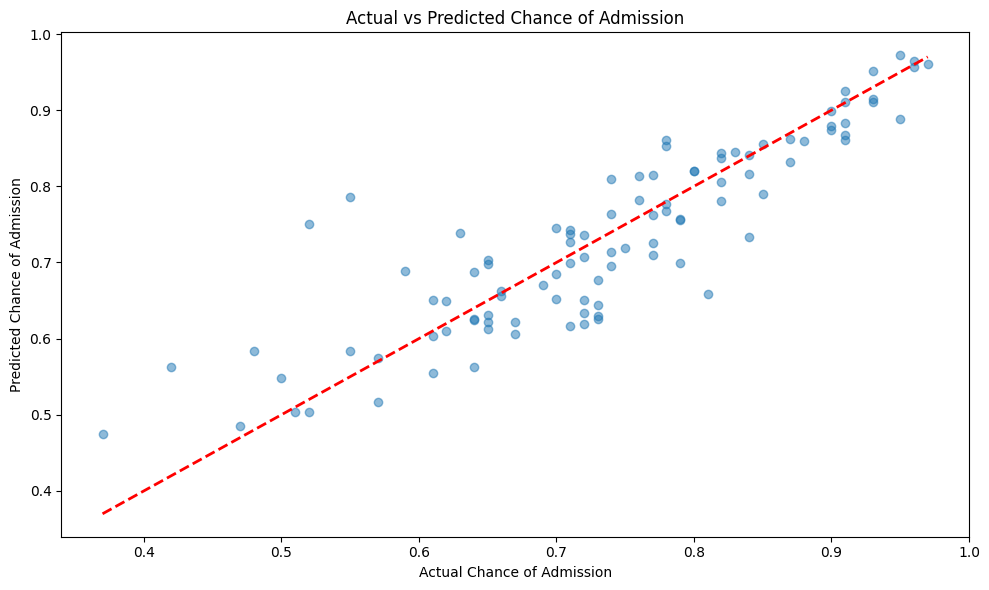

In [97]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.title("Actual vs Predicted Chance of Admission")
plt.tight_layout()
plt.show()

In [89]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model3.feature_importances_
}).sort_values('importance', ascending=False)

In [90]:
feature_importance

,feature,importance
5,CGPA,0.753981
0,GRE Score,0.135653
1,TOEFL Score,0.041853
3,SOP,0.025670
4,LOR,0.021067
2,University Rating,0.012576
6,Research,0.009200


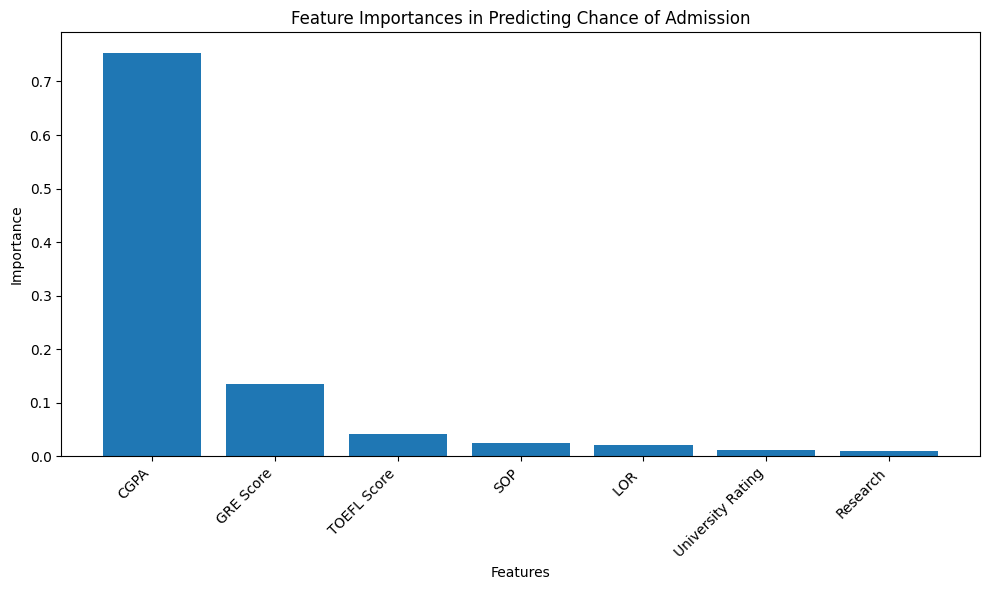

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances in Predicting Chance of Admission")
plt.tight_layout()
plt.show()